## Enviroment Setup

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
# to define the path of Dataset
path = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/Dataset'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

In [4]:
image_generator = ImageDataGenerator(rescale = 1./255, validation_split= 0.2)

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True
)

train_data = image_generator.flow_from_directory(
    batch_size = 32, 
    directory= path, 
    shuffle= True, 
    target_size=(100,100), 
    class_mode = 'categorical', 
    subset="training")

Found 4000 images belonging to 3 classes.


In [26]:
val_data = image_generator.flow_from_directory(
    batch_size = 32,
    directory= path, 
    shuffle= True, 
    target_size=(100,100), 
    class_mode = 'categorical', 
    subset="validation")


Found 1000 images belonging to 3 classes.


In [27]:
train_images, train_labels = next(train_data)

In [28]:
class_names = {0 : 'Covid-19', 1 : 'Normal', 2 : 'Viral Pneumonia'}

In [29]:
num_classes = len(class_names)

## Convolutional Neural Network Model Using Sequential Keras API.


In [34]:
#Using sequential model:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),


    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [35]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer=Adam(lr = 1e-3), 
              metrics= ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [42]:
history = model.fit(train_data, 
                    steps_per_epoch= train_data.n // 32, 
                    epochs = 20, 
                    validation_data= val_data, 
                    validation_steps= val_data.n // 32)

Epoch 1/20
125/125 [==============================] - 21s 167ms/step - loss: 0.1154 - accuracy: 0.9545 - val_loss: 0.2881 - val_accuracy: 0.9123
Epoch 2/20
125/125 [==============================] - 21s 171ms/step - loss: 0.0936 - accuracy: 0.9663 - val_loss: 0.2902 - val_accuracy: 0.9103
Epoch 3/20
125/125 [==============================] - 21s 166ms/step - loss: 0.0742 - accuracy: 0.9730 - val_loss: 0.3556 - val_accuracy: 0.9002
Epoch 4/20
125/125 [==============================] - 21s 166ms/step - loss: 0.0964 - accuracy: 0.9647 - val_loss: 0.2537 - val_accuracy: 0.9224
Epoch 5/20
125/125 [==============================] - 20s 162ms/step - loss: 0.0471 - accuracy: 0.9810 - val_loss: 0.2550 - val_accuracy: 0.9294
Epoch 6/20
125/125 [==============================] - 20s 162ms/step - loss: 0.0768 - accuracy: 0.9718 - val_loss: 0.2455 - val_accuracy: 0.9335
Epoch 7/20
125/125 [==============================] - 21s 164ms/step - loss: 0.0389 - accuracy: 0.9837 - val_loss: 0.2669 - val_ac

In [43]:
model.save('/content/drive/MyDrive/COVID-19_Radiography_Dataset/Dataset/model0.h5')

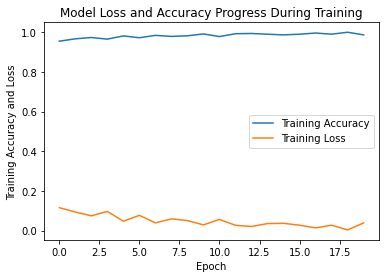

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

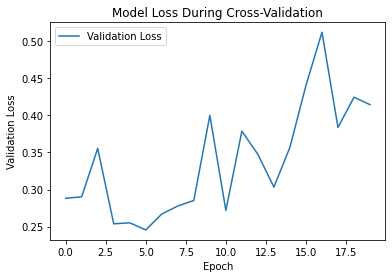

In [45]:
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

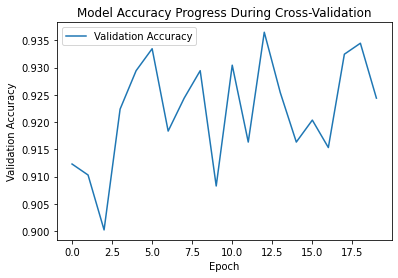

In [46]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

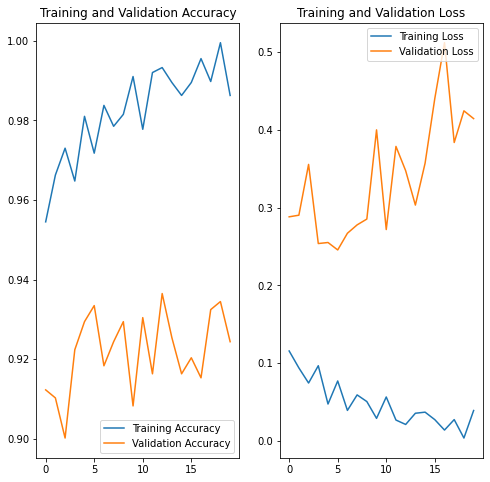

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 10, 10, 64)      